<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

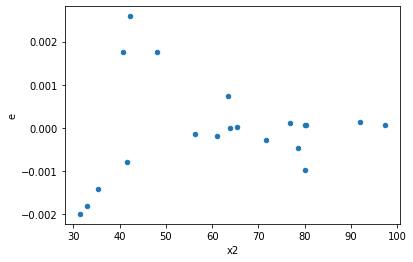

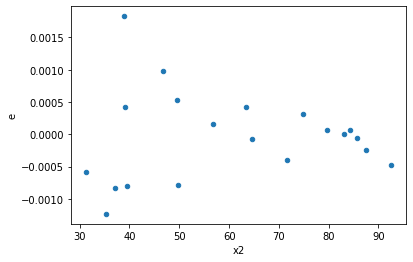

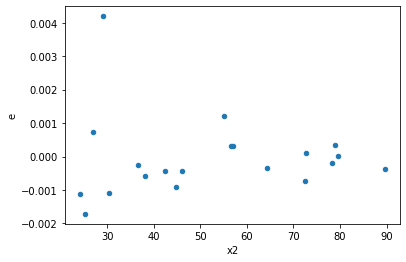

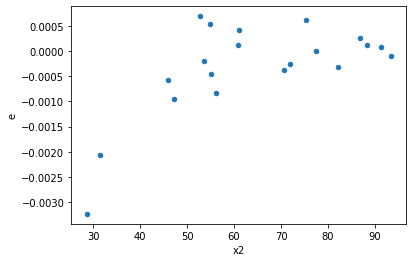

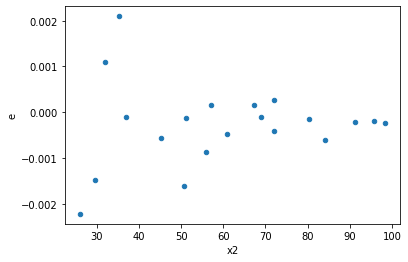

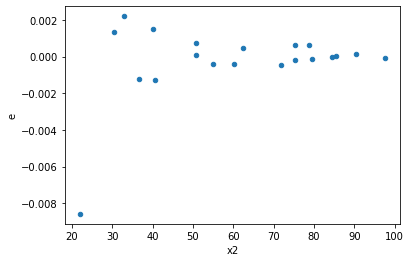

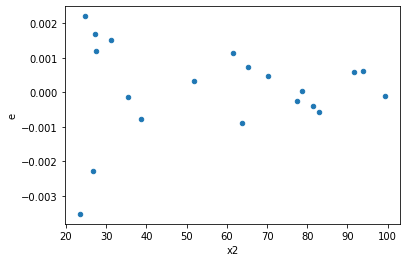

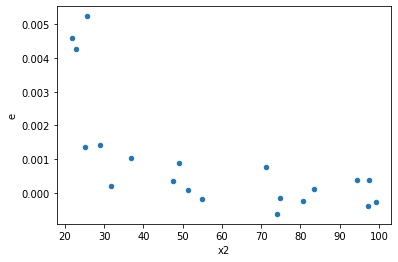

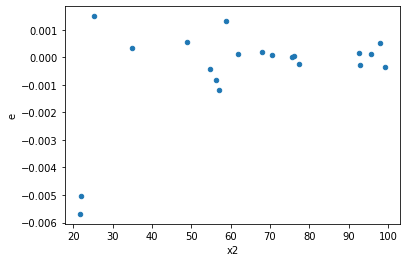

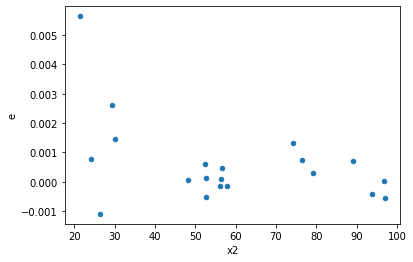

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,1.0525442147459484e-06,1.4957773387497441e-06,2.631360536864871e-07,3.7394433468743603e-07,1.421106417948227,0.7417338043611843,0.6291330978194078,0.37086690218059215,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,1.528990883759258e-07,1.0102915611364588e-06,3.822477209398145e-08,2.525728902841147e-07,6.607570861720918,0.09458652739021733,0.9527067363048913,0.04729326369510867,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,3.563690063502853e-06,3.6758854471516114e-06,8.909225158757132e-07,9.189713617879028e-07,1.0314829240617178,0.9767555981580263,0.5116222009209869,0.48837779907901313,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,5.844925572250096e-07,6.006824392040303e-07,1.461231393062524e-07,1.5017060980100757e-07,1.027699038728372,0.9795107790087823,0.5102446104956089,0.4897553895043911,Reject001=1 : Homoscedasticity
9.0,4.0,4.0,3.115321844885478e-07,2.1441569516717915e-06,7.788304612213695e-08,5.360392379179479e-07,6.882617778936457,0.0883961656399066,0.9558019171800467,0.0441980828199533,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,1.8451675389059576e-07,4.227339050831179e-07,4.612918847264894e-08,1.0568347627077948e-07,2.2910326361679147,0.441752565839191,0.7791237170804045,0.2208762829195955,Reject001=1 : Homoscedasticity
21.0,4.0,4.0,1.1216768829713505e-06,3.6273569625739204e-06,2.804192207428376e-07,9.068392406434801e-07,3.2338697691308034,0.28201135909415753,0.8589943204529212,0.14100567954707877,Reject001=1 : Homoscedasticity
38.0,4.0,4.0,4.688416191698426e-06,8.982271195590691e-06,1.1721040479246065e-06,2.245567798897673e-06,1.9158433953656262,0.5443550377389479,0.7278224811305261,0.27217751886947394,Reject001=1 : Homoscedasticity
43.0,4.0,4.0,7.777771726456684e-07,8.565596108091191e-07,1.944442931614171e-07,2.1413990270227978e-07,1.1012917850178943,0.9277492093561885,0.5361253953219057,0.46387460467809427,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,1.2436899712387687e-05,1.7640876426927365e-07,3.1092249280969218e-06,4.410219106731841e-08,0.014184303833660645,0.001162693369985098,Reject001=0 : Heteroscedasticity
1.0,4.0,4.0,1.0525442147459484e-06,1.4957773387497441e-06,2.631360536864871e-07,3.7394433468743603e-07,1.421106417948227,0.7417338043611843,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,1.528990883759258e-07,1.0102915611364588e-06,3.822477209398145e-08,2.525728902841147e-07,6.607570861720918,0.09458652739021733,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,8.129221269454697e-07,2.0193122187797788e-07,2.0323053173636743e-07,5.048280546949447e-08,0.24840167979770503,0.20603725052041091,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,3.563690063502853e-06,3.6758854471516114e-06,8.909225158757132e-07,9.189713617879028e-07,1.0314829240617178,0.9767555981580263,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,3.191208398158817e-06,1.4177746757249693e-07,7.978020995397043e-07,3.544436689312423e-08,0.044427517693390414,0.010548842648765412,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,1.7027798445730544e-05,2.9189484572727737e-07,4.256949611432636e-06,7.297371143181934e-08,0.01714225398295488,0.001685064562151978,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,7.161519504181162e-06,1.718190024907223e-06,1.7903798760452905e-06,4.2954750622680576e-07,0.23991975779778016,0.19566607682065038,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,5.844925572250096e-07,6.006824392040303e-07,1.461231393062524e-07,1.5017060980100757e-07,1.027699038728372,0.9795107790087823,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      782
Reject001=0 : Heteroscedasticity    218
Name: Result_test, dtype: int64